In [2]:
import pandas as pd
import numpy as np
chunk = pd.read_csv("final_animedataset.csv", chunksize=100000)
for df in chunk:
    break
#df = pd.read_csv("final_animedataset.csv")
df.head(5)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,2255153,Female,One Piece,TV,Manga,8.54,423868,91.0,35,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,2255153,Female,Chobits,TV,Manga,7.53,175388,1546.0,188,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,2255153,Female,Gakuen Alice,TV,Manga,7.77,33244,941.0,1291,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,2255153,Female,Fruits Basket,TV,Manga,7.77,167968,939.0,222,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,2255153,Female,Ultra Maniac,TV,Manga,7.26,9663,2594.0,2490,"Magic, Comedy, Romance, School, Shoujo"


In [2]:
df = df[df.my_score != 0]
#pd.Series(df["title"].unique()).to_csv('out.csv')

In [ ]:
print(df.shape)
genre = df['genre'].str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
df1 = pd.DataFrame(df)
for i in unique_genre:
    df1[i] = genre.map(lambda x: i in x, na_action="ignore")
print(df1.head(5))

In [3]:
a = df.groupby(["gender", "genre"], as_index = False).agg({"my_score": ["sum", "count"]})
a

gender                                             genre my_score  \
                                                                         sum   
0          Female                                            Action    62417   
1          Female                                 Action, Adventure    42024   
2          Female  Action, Adventure, Cars, Comedy, Sci-Fi, Shounen     1425   
3          Female                   Action, Adventure, Cars, Sci-Fi     1652   
4          Female                         Action, Adventure, Comedy      226   
...           ...                                               ...      ...   
10994  Non-Binary                             Supernatural, Shounen       87   
10995  Non-Binary                       Supernatural, Slice of Life       64   
10996  Non-Binary                                  Thriller, Sci-Fi     2313   
10997  Non-Binary                                           Vampire        9   
10998  Non-Binary                                              Yaoi       73   

             
      count  
0      8976  
1      5601  
2       204  
3       250  
4        42  
...     ...  
10994    14  
10995    11  
10996   270  
10997     3  
10998    13  

[10999 rows x 4 columns]

In [4]:

genre = a.genre.str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
unique_genre

['Fantasy',
 'Yaoi',
 'Josei',
 'Historical',
 'Dementia',
 'Hentai',
 'Comedy',
 'Seinen',
 'Psychological',
 'Samurai',
 'Mystery',
 'Cars',
 'Demons',
 'Slice of Life',
 'Shoujo',
 'Magic',
 'Sci-Fi',
 'Parody',
 'Thriller',
 'Space',
 'Action',
 'Horror',
 'Yuri',
 'Shoujo Ai',
 'Supernatural',
 'Drama',
 'Harem',
 'School',
 'Romance',
 'Super Power',
 'Shounen Ai',
 'Mecha',
 'Sports',
 'Vampire',
 'Military',
 'Adventure',
 'Ecchi',
 'Shounen',
 'Kids',
 'Police',
 'Music',
 'Game',
 'Martial Arts']

In [5]:
for i in unique_genre:
    a[i] = genre.map(lambda x: i in x, na_action="ignore")
print(a.head(5))

   gender                                             genre my_score        \
                                                                 sum count   
0  Female                                            Action    62417  8976   
1  Female                                 Action, Adventure    42024  5601   
2  Female  Action, Adventure, Cars, Comedy, Sci-Fi, Shounen     1425   204   
3  Female                   Action, Adventure, Cars, Sci-Fi     1652   250   
4  Female                         Action, Adventure, Comedy      226    42   

  Fantasy   Yaoi  Josei Historical Dementia Hentai  ... Vampire Military  \
                                                    ...                    
0   False  False  False      False    False  False  ...   False    False   
1   False  False  False      False    False  False  ...   False    False   
2   False  False  False      False    False  False  ...   False    False   
3   False  False  False      False    False  False  ...   False    False 

Text(0.5, 0, 'Genre')

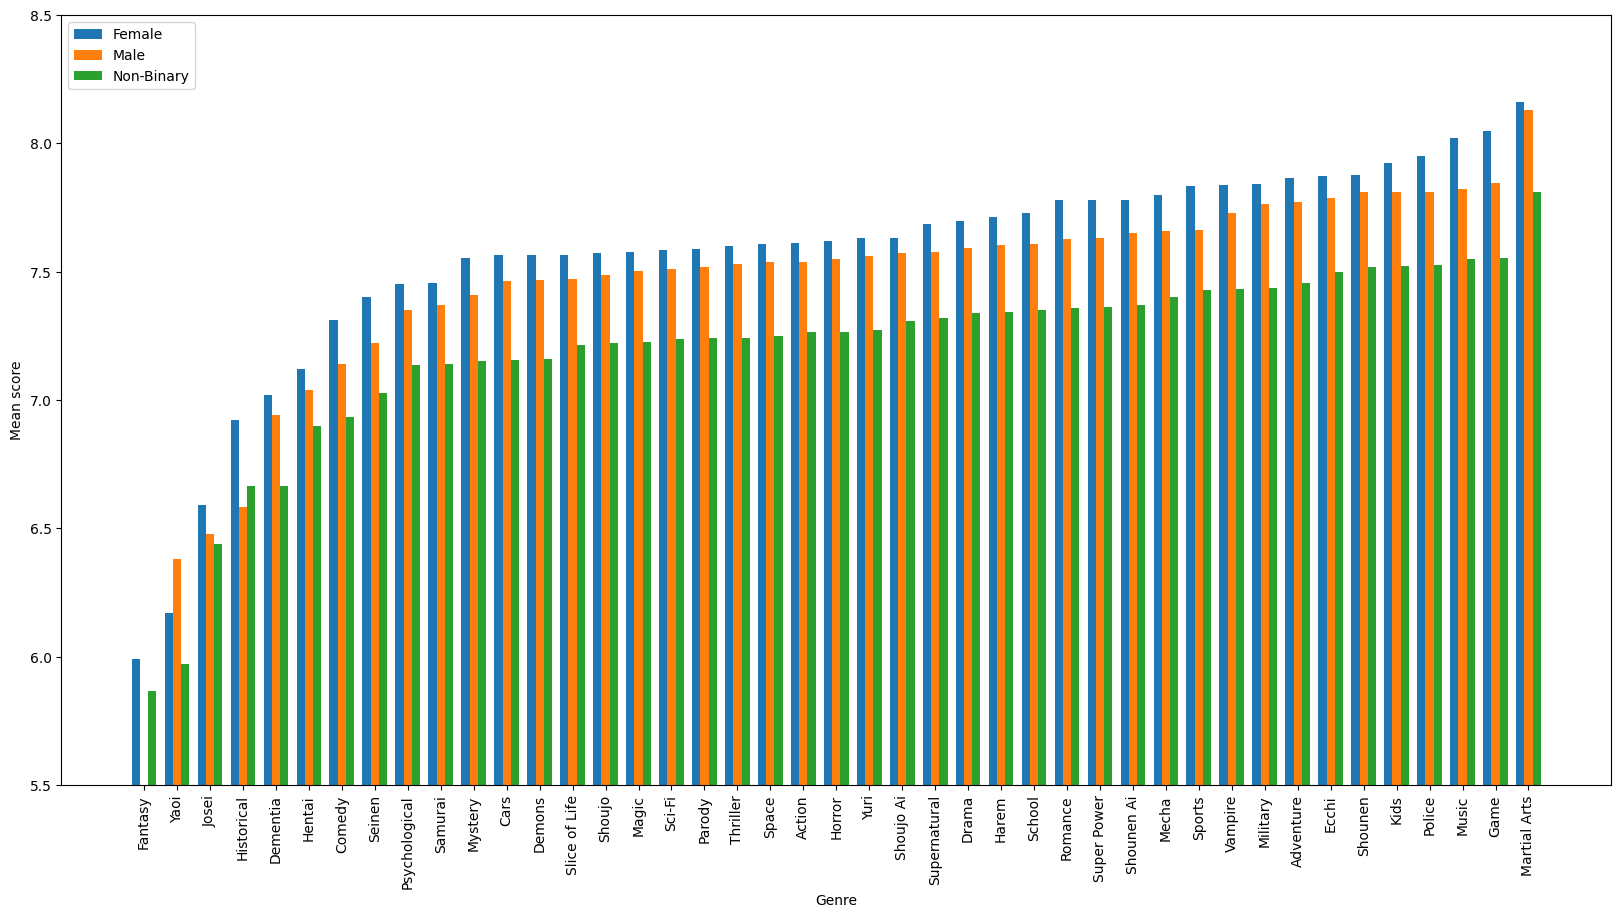

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
bar_width = 0.25
index = np.arange(len(unique_genre))

for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    genred = {}
    for genre in unique_genre:
        s = a.loc[(a["gender"]==g) & (a[genre]==True)]
        mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()
        genred[genre] = mean
    genred = {k: v for k, v in sorted(genred.items(), key=lambda item: item[1])}
    names = list(genred.keys())
    values = list(genred.values())
    ax.bar(index + i * bar_width, values, bar_width, label=g)

ax.set_ylim([5.5, 8.5])
ax.set_xticks(index + bar_width)
ax.set_xticklabels(unique_genre, rotation=90)
plt.legend(loc="upper left")
plt.ylabel("Mean score")
plt.xlabel("Genre")



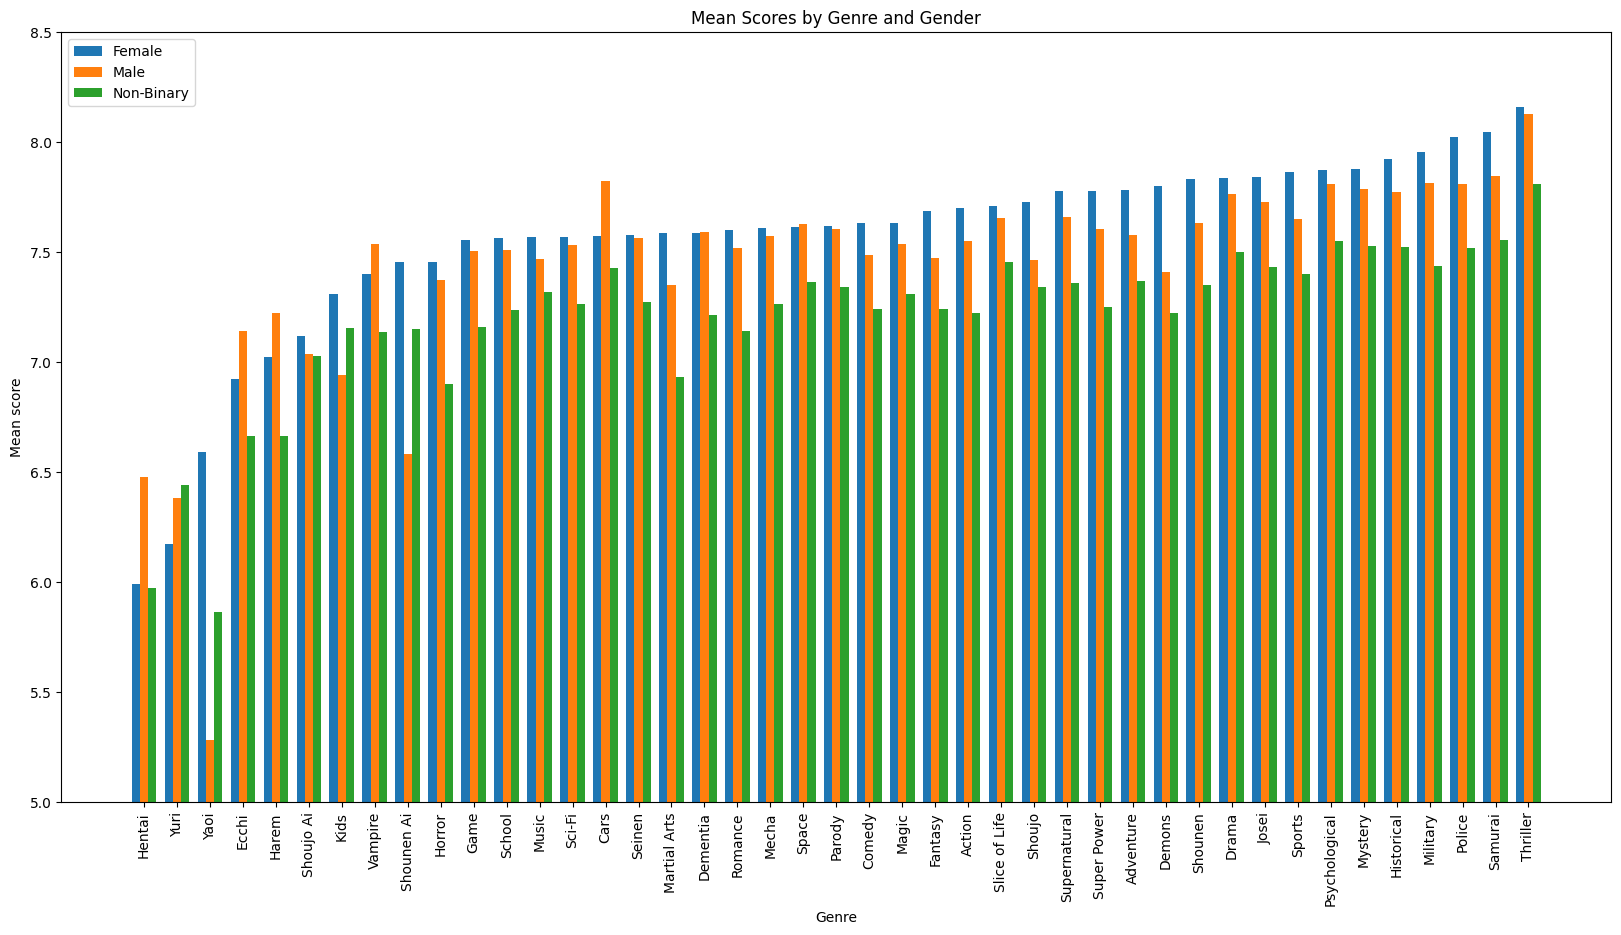

In [23]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('default')  # Use default light mode style

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
bar_width = 0.25
index = np.arange(len(unique_genre))

# Calculate mean scores for each gender and genre
mean_scores = {"Female": {}, "Male": {}, "Non-Binary": {}}
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    for genre in unique_genre:
        s = a.loc[(a["gender"] == g) & (a[genre] == True)]
        mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()
        mean_scores[g][genre] = mean

# Sort genres by female mean score
sorted_genres = sorted(mean_scores["Female"].items(), key=lambda item: item[1])
sorted_genres = [genre for genre, score in sorted_genres]

# Plot the sorted genres
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    values = [mean_scores[g][genre] for genre in sorted_genres]
    ax.bar(index + i * bar_width, values, bar_width, label=g)

ax.set_ylim([5, 8.5])
ax.set_xticks(index + bar_width)
ax.set_xticklabels(sorted_genres, rotation=90)
plt.legend(loc="upper left")
plt.ylabel("Mean score")
plt.xlabel("Genre")
plt.title("Mean Scores by Genre and Gender")
plt.show()

In [ ]:
#Check if there are mismatches among the same anime. Takes forever to run.(7700k 7:40 min)
#for title in df1["title"].unique():
#    genre_val = df1[df1["title"]==title][unique_genre].sum()
#    if (np.unique(genre_val).size > 2):
#        print("Theres genre mismatch for title", title)
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)
for n, title in enumerate(df["title"].unique()):
    print(n, unique_cols(df[df["title"]==title][["title", "popularity", "rank", "scored_by", "score", "source", "type"]]))


In [ ]:
sex = (df1["Hentai"]==True) | (df1["Ecchi"]==True) | (df1["Harem"]==True) | (df1["Yaoi"]==True)
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].std())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].std())

In [ ]:
best = ("", 0)
for title in df1.loc[sex]["title"].unique():
    score = df1.loc[sex & (df1["title"]==title)]["score"].mean()
    if score > best[1]:
        best = (title, score)
    print(title, score)
print("Best sex", best)

In [ ]:
pd.set_option('display.max_columns', None)
df1.loc[df1["title"]==best[0]].head(1)

In [ ]:
df1.loc[df1["Music"]==True]["title"].unique()

In [ ]:
df1.loc[df1["title"]=="Stein"]["my_score"]

In [ ]:

best_dementia = ("", 0)
for title in df1.loc[df1["Dementia"]==True]["title"].unique():
    score = df1.loc[df1["title"]==title]["score"].mean()
    if score > best_dementia[1]:
        best_dementia = (title, score)
    print(title, score)
print("Best dementia", best_dementia)

In [ ]:
import matplotlib.pyplot as plt
title_genre_count = []
for i in unique_genre:
    title_genre_count.append(df.loc[df1[i]==True]["title"].unique().size)
k = pd.DataFrame({"genre":unique_genre, "count":title_genre_count}).sort_values("count", ascending=False)
plt.bar(k["genre"],k["count"]/df1["title"].unique().size, width=0.5)
plt.xticks(rotation=90)

In [ ]:
df_zero = df_orig[df_orig.my_score == 0]
z = df_zero.groupby(["title"]).agg({"score": ["first"], "popularity": ["first"], "scored_by": ["first"], "username": ["count"]})
a = df_orig.groupby(["title"]).agg({"username": ["count"]})
z["total"] = a["username"]
z["%"]=z["username"]/a["username"]


In [ ]:
ax = z["%"].hist(bins=100, density=1)
ax.set_ylabel("Density")
ax.set_xlabel("Rating loss")
z.sort_values("%", ascending=False)

In [ ]:
#a = (z["scored_by"])["first"]
a = (z["popularity"])["first"]
print(a)
ax = z.plot("%", "score", kind="scatter", c=a, cmap='inferno_r')
ax.set_ylabel("Rating score")
ax.set_xlabel("Rating loss")
cbar = plt.gcf().get_axes()[1]
cbar.invert_yaxis()
cbar.set_ylabel("Popularity rank")
z.sort_values("total", ascending=False)

type
Movie      5.935449
Music      5.849772
TV         5.510483
Special    5.416378
OVA        5.026215
ONA        4.630207
dtype: float64


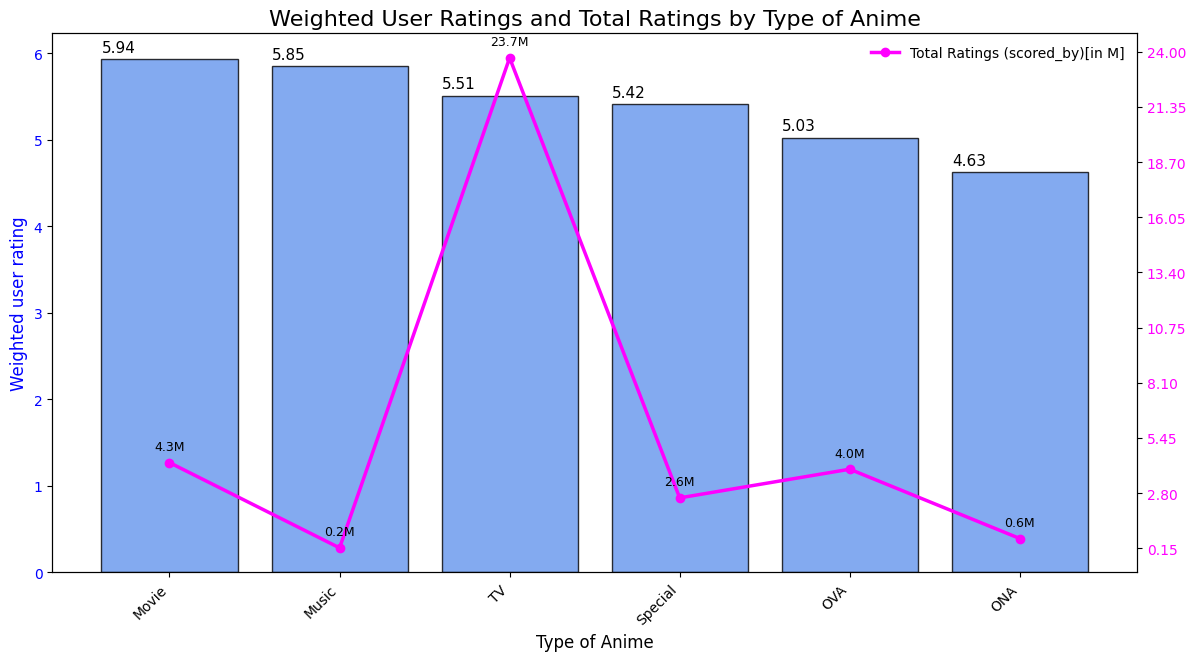

In [40]:
import matplotlib.pyplot as plt
type_scores_correlation = df.groupby('type').apply(
    lambda x: (x['my_score'] * x["scored_by"]).sum() / x['scored_by'].sum(), include_groups=False
).sort_values(ascending=False)
print(type_scores_correlation)

type_ratings = df.groupby('type').agg({"scored_by": ["count"]})["scored_by"]["count"]
#print(f"type_ratings: {type_ratings[:5]}")

#plt.ticklabel_format(style='plain', axis='y')
fig, ax1 = plt.subplots(figsize=(14, 7))

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


bars = ax1.bar(type_scores_correlation.index, type_scores_correlation, 
               color='cornflowerblue', alpha=0.8, label='Weighted My Score', edgecolor='black')
ax1.set_xlabel('Type of Anime', fontsize=12)
ax1.set_ylabel('Weighted user rating', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.set_xticks(type_scores_correlation.index)
ax1.set_xticklabels(type_scores_correlation.index, rotation=45, ha='right', fontsize=10)


for bar in bars:
    ax1.text(bar.get_x() + 0.2, bar.get_height() + 0.05,
             f'{bar.get_height():.2f}', ha='right', va='bottom', fontsize=11, color='black')

# Line plot for Total Ratings
ax2 = ax1.twinx()
adjusted_total_ratings = type_ratings[type_scores_correlation.index] / 1e6  # Convert to millions
line = ax2.plot(adjusted_total_ratings, 
                color='magenta', marker='o', label='Total Ratings (scored_by)[in M]', linewidth=2.5)
#line, = ax2.plot(type_ratings[type_scores_correlation.index], 
#                 color='magenta', marker='o', label='Total Ratings (scored_by)', linewidth=2.5)

#ax2.set_ylabel('Total Ratings', color='magenta', fontsize=12)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='magenta', labelsize=10)
ax2.set_yticks(np.linspace(start=0.15, stop=24, num=10))
#ax2.ticklabel_format(style = 'plain')
#ax2.set_ylim(bottom=1_000, top=1.5e7)


for i, value in enumerate(adjusted_total_ratings):
    ax2.text(i, value + adjusted_total_ratings.max() * 0.025, f'{value:.1f}M', color='k', ha='center', fontsize=9)


ax2.legend(loc='upper right', frameon=False, fontsize=10)

#fig.suptitle('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=14)
plt.title('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=16)
#fig.tight_layout(rect=[0, 0, 0.85, 1]) 
#plt.subplots_adjust(right=0.8)

#plt.savefig('type_ratings.png')
plt.show()

In [45]:
df["scored_by"].iloc[215]
df['my_score'].iloc[2] * df["scored_by"].iloc[2]

np.int64(232708)

# User specific analysis

In [3]:
a = df.groupby(["username", "genre"], as_index = False).agg({"my_score":["sum", "count"]})
a

username                                              genre  \
                                                                           
0            -Kenjiro  Action, Adventure, Comedy, Fantasy, Magic, Sci...   
1            -Kenjiro  Action, Adventure, Comedy, Fantasy, Martial Ar...   
2            -Kenjiro  Action, Adventure, Comedy, Magic, Fantasy, Sho...   
3            -Kenjiro  Action, Adventure, Comedy, Super Power, Martia...   
4            -Kenjiro   Action, Adventure, Comedy, Supernatural, Shounen   
...               ...                                                ...   
48198  zombie_pegasus                              Supernatural, Fantasy   
48199  zombie_pegasus                           Supernatural, Historical   
48200  zombie_pegasus                                Supernatural, Music   
48201  zombie_pegasus                        Supernatural, School, Drama   
48202  zombie_pegasus                                   Thriller, Sci-Fi   

      my_score        
           sum count  
0            2     1  
1           17     2  
2            8     1  
3           17     2  
4           16     2  
...        ...   ...  
48198        6     1  
48199        4     1  
48200        4     1  
48201        6     1  
48202        9     1  

[48203 rows x 4 columns]

In [4]:
genre = a.genre.str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
unique_genre

['Fantasy',
 'Shounen Ai',
 'Mecha',
 'Seinen',
 'Horror',
 'Mystery',
 'Shoujo',
 'Vampire',
 'Supernatural',
 'Magic',
 'Super Power',
 'Kids',
 'Adventure',
 'Police',
 'Space',
 'Samurai',
 'Parody',
 'Josei',
 'Slice of Life',
 'Military',
 'Historical',
 'Dementia',
 'School',
 'Thriller',
 'Action',
 'Shoujo Ai',
 'Demons',
 'Psychological',
 'Drama',
 'Ecchi',
 'Sci-Fi',
 'Yuri',
 'Shounen',
 'Sports',
 'Hentai',
 'Romance',
 'Cars',
 'Comedy',
 'Yaoi',
 'Music',
 'Harem',
 'Game',
 'Martial Arts']

In [5]:
#print(a.iloc[0]["my_score"]["sum"] if ("Action" in a.iloc[0]["genre"]) else 0)
#print("Action" in a.iloc[0]["genre"].values)
for i in unique_genre:
    print(i)
    a[i+"_sum"] = a.apply(lambda x: x["my_score"]["sum"] if (i in str(x["genre"].values)) else 0, axis=1)
    a[i+"_count"] = a.apply(lambda x: x["my_score"]["count"] if (i in str(x["genre"].values)) else 0, axis=1)
a


Fantasy
Shounen Ai
Mecha
Seinen
Horror
Mystery
Shoujo
Vampire
Supernatural
Magic
Super Power
Kids
Adventure
Police
Space
Samurai
Parody
Josei
Slice of Life
Military
Historical
Dementia
School
Thriller
Action
Shoujo Ai
Demons
Psychological
Drama
Ecchi
Sci-Fi
Yuri
Shounen
Sports
Hentai
Romance
Cars
Comedy
Yaoi
Music
Harem
Game
Martial Arts


username                                              genre  \
                                                                           
0            -Kenjiro  Action, Adventure, Comedy, Fantasy, Magic, Sci...   
1            -Kenjiro  Action, Adventure, Comedy, Fantasy, Martial Ar...   
2            -Kenjiro  Action, Adventure, Comedy, Magic, Fantasy, Sho...   
3            -Kenjiro  Action, Adventure, Comedy, Super Power, Martia...   
4            -Kenjiro   Action, Adventure, Comedy, Supernatural, Shounen   
...               ...                                                ...   
48198  zombie_pegasus                              Supernatural, Fantasy   
48199  zombie_pegasus                           Supernatural, Historical   
48200  zombie_pegasus                                Supernatural, Music   
48201  zombie_pegasus                        Supernatural, School, Drama   
48202  zombie_pegasus                                   Thriller, Sci-Fi   

      my_score       Fantasy_sum Fantasy_count Shounen Ai_sum  \
           sum count                                            
0            2     1           2             1              0   
1           17     2          17             2              0   
2            8     1           8             1              0   
3           17     2           0             0              0   
4           16     2           0             0              0   
...        ...   ...         ...           ...            ...   
48198        6     1           6             1              0   
48199        4     1           0             0              0   
48200        4     1           0             0              0   
48201        6     1           0             0              0   
48202        9     1           0             0              0   

      Shounen Ai_count Mecha_sum Mecha_count  ... Yaoi_sum Yaoi_count  \
                                              ...                       
0                    0         0           0  ...        0          0   
1                    0         0           0  ...        0          0   
2                    0         0           0  ...        0          0   
3                    0         0           0  ...        0          0   
4                    0         0           0  ...        0          0   
...                ...       ...         ...  ...      ...        ...   
48198                0         0           0  ...        0          0   
48199                0         0           0  ...        0          0   
48200                0         0           0  ...        0          0   
48201                0         0           0  ...        0          0   
48202                0         0           0  ...        0          0   

      Music_sum Music_count Harem_sum Harem_count Game_sum Game_count  \
                                                                        
0             0           0         0           0        0          0   
1             0           0         0           0        0          0   
2             0           0         0           0        0          0   
3             0           0         0           0        0          0   
4             0           0         0           0        0          0   
...         ...         ...       ...         ...      ...        ...   
48198         0           0         0           0        0          0   
48199         0           0         0           0        0          0   
48200         4           1         0           0        0          0   
48201         0           0         0           0        0          0   
48202         0           0         0           0        0          0   

      Martial Arts_sum Martial Arts_count  
                                           
0                    0                  0  
1                   17                  2  
2                    0                  0  
3                   17                  2  
4             

In [13]:
agg_sum = {i+"_sum":["sum"] for i in unique_genre}
agg_count = {i+"_count":["sum"] for i in unique_genre}
agg_genre = agg_sum | agg_count
#agg_genre["count"] = ["sum"]
b = a.droplevel(1, axis=1)[list(agg_genre.keys())+["username"]]
b["count"] = a["my_score"]["count"]
b = b.groupby(["username"], as_index = False).agg(agg_genre | {"count":["sum"]})
b[["username", "count"]].droplevel(1, axis=1).sort_values("count")

,username,count
64,L-LawlietDN,6
12,Awesomemikko,11
6,AnimeFan71194,15
136,Zodezu,16
128,VoliMedjed,17
...,...,...
68,LunarSonata,1301
195,zombie_pegasus,1496
8,Areq,1566
187,tamer91,1625


In [18]:
out = pd.DataFrame(columns=unique_genre+["username"])
out["username"] = b.username
out["count"] = b["count"]["sum"]
for i in unique_genre:
    out[i] = b.apply(lambda x: x[i+"_sum"]["sum"]/x[i+"_count"]["sum"] if (x[i+"_count"]["sum"] != 0) else 0, axis=1)
    out[i+"_count"] = b.apply(lambda x: x[i+"_count"]["sum"], axis=1)
out

,Fantasy,Shounen Ai,Mecha,Seinen,Horror,Mystery,Shoujo,Vampire,Supernatural,Magic,...,Sports_count,Hentai_count,Romance_count,Cars_count,Comedy_count,Yaoi_count,Music_count,Harem_count,Game_count,Martial Arts_count
0,7.212766,0.000000,7.428571,6.142857,7.666667,7.800000,3.000000,6.800000,7.461538,6.833333,...,0,0,68,0,82,0,0,38,8,5
1,7.273684,0.000000,7.000000,6.711111,7.041667,7.527778,7.350000,7.400000,7.233333,7.255319,...,4,11,119,0,173,0,7,54,11,17
2,7.875000,0.000000,0.000000,7.500000,7.500000,8.000000,7.375000,7.000000,7.555556,7.250000,...,1,0,31,0,29,0,2,5,0,0
3,8.040541,0.000000,8.350000,7.913043,7.785714,7.939394,8.058824,7.818182,8.093023,7.975610,...,5,0,118,0,188,0,11,29,11,16
4,6.578947,0.000000,7.500000,6.833333,4.600000,6.594595,6.750000,8.333333,6.591837,7.250000,...,7,0,48,0,98,0,11,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,9.000000,0.000000,0.000000,8.857143,9.000000,8.333333,8.909091,8.200000,8.625000,9.000000,...,5,0,44,0,56,0,3,13,3,2
192,7.820690,0.000000,7.700000,7.978723,7.739130,7.900000,7.666667,8.250000,8.088435,7.728571,...,7,0,231,0,322,0,10,98,14,29
193,8.421053,9.000000,8.416667,7.333333,6.333333,6.714286,9.500000,8.000000,7.583333,8.111111,...,1,0,10,0,26,0,0,0,0,5
194,7.784615,0.000000,7.972973,8.142857,8.250000,8.468750,8.111111,7.875000,8.187970,8.028169,...,10,4,211,1,439,0,12,122,22,23


In [ ]:
out.to_csv("user_analyse.csv")

In [ ]:
out = pd.read_csv("user_analyse.csv")

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
out.sort_values("Mecha", ascending=False).head(10)

,Fantasy,Shounen Ai,Mecha,Seinen,Horror,Mystery,Shoujo,Vampire,Supernatural,Magic,Super Power,Kids,Adventure,Police,Space,Samurai,Parody,Josei,Slice of Life,Military,Historical,Dementia,School,Thriller,Action,Shoujo Ai,Demons,Psychological,Drama,Ecchi,Sci-Fi,Yuri,Shounen,Sports,Hentai,Romance,Cars,Comedy,Yaoi,Music,Harem,Game,Martial Arts,username,count,Fantasy_count,Shounen Ai_count,Mecha_count,Seinen_count,Horror_count,Mystery_count,Shoujo_count,Vampire_count,Supernatural_count,Magic_count,Super Power_count,Kids_count,Adventure_count,Police_count,Space_count,Samurai_count,Parody_count,Josei_count,Slice of Life_count,Military_count,Historical_count,Dementia_count,School_count,Thriller_count,Action_count,Shoujo Ai_count,Demons_count,Psychological_count,Drama_count,Ecchi_count,Sci-Fi_count,Yuri_count,Shounen_count,Sports_count,Hentai_count,Romance_count,Cars_count,Comedy_count,Yaoi_count,Music_count,Harem_count,Game_count,Martial Arts_count
137,9.285714,0.0,10.000000,10.000000,0.000000,8.000000,9.000000,0.000000,9.000000,8.666667,10.000000,0.000000,9.500000,0.000000,0.000000,0.000000,8.000000,9.000000,9.200000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.0,9.000000,10.000000,9.714286,10.000000,9.333333,0.0,9.166667,0.000000,0.0,9.600000,0.000000,9.214286,0.0,0.000000,10.000000,0.000000,8.000000,_mayumih,20,7,0,1,1,0,3,3,0,7,3,1,0,4,0,0,0,1,1,5,0,2,0,7,0,8,0,2,1,7,1,3,0,6,0,0,10,0,14,0,0,1,0,1
58,9.892857,0.0,10.000000,9.538462,9.750000,9.833333,9.600000,10.000000,9.784314,9.937500,9.825000,7.000000,9.700000,9.000000,0.000000,9.500000,9.636364,0.000000,9.818182,10.000000,9.700000,9.666667,9.800000,9.666667,9.817204,9.5,9.666667,9.769231,9.848485,9.875000,9.806452,0.0,9.802817,9.666667,10.0,9.955556,0.000000,9.761905,0.0,0.000000,9.961538,9.500000,9.800000,Jony,180,56,0,8,13,8,24,5,6,51,16,40,2,60,1,0,4,11,0,11,6,10,3,35,6,93,4,3,13,33,48,31,0,71,3,1,45,0,126,0,0,26,2,10
91,9.375000,8.5,10.000000,8.000000,8.250000,10.000000,9.555556,7.000000,8.833333,9.555556,10.000000,0.000000,9.714286,10.000000,10.000000,0.000000,7.000000,0.000000,8.000000,9.571429,9.000000,10.000000,9.000000,10.000000,9.583333,0.0,10.000000,9.428571,9.444444,9.000000,9.750000,0.0,9.090909,0.000000,9.0,9.055556,0.000000,9.210526,7.5,9.000000,10.000000,0.000000,0.000000,Raian-kun,42,16,2,4,1,4,4,9,2,6,9,2,0,14,1,2,0,1,0,4,7,3,3,3,2,12,0,1,7,27,2,8,0,11,0,1,18,0,19,2,1,1,0,0
183,8.562500,0.0,10.000000,8.500000,8.111111,8.966667,0.000000,9.000000,8.513514,8.000000,8.777778,0.000000,8.555556,10.000000,10.000000,9.500000,9.200000,9.000000,9.500000,9.800000,8.666667,9.750000,8.375000,9.727273,8.725000,0.0,7.833333,9.187500,8.678571,6.333333,9.312500,0.0,8.266667,10.000000,0.0,8.444444,0.000000,8.322581,0.0,0.000000,7.333333,0.000000,10.000000,shadowrost,73,16,0,4,4,9,30,0,4,37,14,9,0,18,2,1,2,5,1,6,5,6,4,8,11,40,0,6,16,28,3,16,0,15,1,0,18,0,31,0,0,3,0,1
145,8.000000,0.0,10.000000,0.000000,8.500000,8.000000,9.333333,0.000000,9.500000,8.333333,8.000000,0.000000,8.142857,10.000000,0.000000,0.000000,6.666667,0.000000,8.428571,8.000000,0.000000,0.000000,8.375000,10.000000,8.500000,0.0,7.000000,10.000000,8.875000,7.800000,7.666667,0.0,8.375000,0.000000,0.0,8.600000,0.000000,8.466667,0.0,0.000000,7.666667,0.000000,8.000000,clannad187,24,6,0,1,0,2,5,3,0,8,3,2,0,7,1,0,0,3,0,7,1,0,0,8,1,12,0,1,1,8,5,6,0,8,0,0,10,0,15,0,0,3,0,2
61,9.531746,9.0,9.666667,9.615385,9.285714,9.125000,9.687500,9.000000,9.461538,9.629630,9.615385,9.535714,9.635593,9.500000,10.000000,9.000000,9.250000,6.666667,9.388889,9.333333,9.300000,9.750000,9.409091,9.583333,9.625954,9.0,9.642857,9.555556,9.500000,9.466667,9.528302,0.0,9.616162,9.400000,9.0,9.350000,0.000000,9.562500,0.0,9.500000,9.214286,9.000000,9.533333,Kito-kun,264,126,4,9,13,14,32,16,1,52,27,39,28,118,4,2,2,8,3,18,6,10,4,44,12,131,1,14,18,76,15,53,0,99,5,2,60,0,160,0,2,14,7,15
78,8.977778,0.0,9.636364,8.857143,9.000000,9.545455,9.607143,9.222222,9.395349,9.250000,9.466667,0.000000,9.239130,10.000000,10.000000,10.000000,8.428571,9.3

In [59]:
df[(df["username"]=="Tomoki-sama") & (df['genre'].str.contains("Mecha"))]

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
9501,Tomoki-sama,1575,10,1933206,Male,Code Geass: Hangyaku no Lelouch,TV,Original,8.79,627740,30.0,9,"Action, Military, Sci-Fi, Super Power, Drama, ..."
9504,Tomoki-sama,2001,10,1933206,Male,Tengen Toppa Gurren Lagann,TV,Original,8.74,449656,41.0,24,"Action, Adventure, Comedy, Mecha, Sci-Fi"
9508,Tomoki-sama,2904,10,1933206,Male,Code Geass: Hangyaku no Lelouch R2,TV,Original,8.95,543904,18.0,22,"Action, Military, Sci-Fi, Super Power, Drama, ..."
9587,Tomoki-sama,15583,9,1933206,Male,Date A Live,TV,Light novel,7.47,248521,1719.0,104,"Comedy, Harem, Mecha, Romance, School, Sci-Fi"
9626,Tomoki-sama,22729,10,1933206,Male,Aldnoah.Zero,TV,Original,7.57,184307,1419.0,181,"Action, Military, Sci-Fi, Mecha"
9640,Tomoki-sama,27655,10,1933206,Male,Aldnoah.Zero 2nd Season,TV,Original,7.11,122672,3146.0,379,"Action, Mecha, Sci-Fi, Space"
9676,Tomoki-sama,35849,10,1933206,Male,Darling in the FranXX,TV,Original,8.17,76973,342.0,239,"Action, Sci-Fi, Drama, Mecha"
9778,Tomoki-sama,30749,8,1933206,Male,Saijaku Muhai no Bahamut,TV,Light novel,6.87,75521,4049.0,509,"Action, Harem, Supernatural, Romance, Ecchi, F..."
9799,Tomoki-sama,3352,9,1933206,Male,Tengen Toppa Gurren Lagann: Mitee Mono wa Mite...,Special,Original,7.45,13744,1833.0,2131,"Action, Adventure, Comedy, Mecha, Sci-Fi"
9851,Tomoki-sama,4107,10,1933206,Male,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,Movie,Original,8.22,49113,295.0,914,"Action, Comedy, Mecha"
